In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import time

In [ ]:
def model()

In [ ]:
# define regression function
def regression1(X_train, X_test, y_train, y_test):
    Regressor = {'Random Forest Regressor': RandomForestRegressor(n_estimators=200)}

    for name, clf in Regressor.items():
        st = time.time()
        print(name)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        et = time.time()
        print(f'R-Squared: {r2_score(y_test, pred):.9f}')
        print(f'Mean absolute error: {mean_absolute_error(y_test, pred):.9f}')
        print(f'Mean squared error: {mean_squared_error(y_test, pred):.9f}')
        print('Execution time:', et - st)
        print()
        
        return pred
        
# define regression function
def regression2(X_train, X_test, y_train, y_test):
    Regressor = {'Extreme Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=500)}

    for name, clf in Regressor.items():
        st = time.time()
        print(name)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        et = time.time()
        print(f'R-Squared: {r2_score(y_test, pred):.9f}')
        print(f'Mean absolute error: {mean_absolute_error(y_test, pred):.9f}')
        print(f'Mean squared error: {mean_squared_error(y_test, pred):.9f}')
        print('Execution time:', et - st)
        print()
        
        return pred

In [ ]:
X = np.random.random((500,10))
y = np.random.random((500,))

X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC = train_test_split(X, y, test_size=0.2)

In [ ]:
# Bitcoin (BTC)
print('Bitcoin (BTC):')
pred1 = regression1(X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC)

In [ ]:






plt.figure(figsize=(15,8))
(bitcoin[:0]['daily_avg']).plot(label='Historical Price')
(bitcoin[-31:]['daily_avg']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction with Random Forest Regressor')

# Bitcoin (BTC)
print('Bitcoin (BTC):')
regression2(X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC)


plt.figure(figsize=(15,8))
(bitcoin[:0]['daily_avg']).plot(label='Historical Price')
(bitcoin[-31:]['daily_avg']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction with Extreme Gradient Boosting Regressor')

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({"": [0,1,2,3,4,5,6,7,8],
                     "c1": ["abc1", "", "dfg", "abc1", "","dfg","ghj","abc1","abc1"], 
                     "c2": ["abc1", "abc1", "dfg", "dfg", "","dfg","","ghj","abc1"], 
                     "c3": ["abc1", "", "dfg", "dfg", "dfg","dfg","abc1","ghj","abc1"]})

In [ ]:
df

In [ ]:
output = df[df.isin(['abc1', 'dfg']).any(1)]

print(output)


        c1    c2    c3
0  0  abc1  abc1  abc1
1  1        abc1      
2  2   dfg   dfg   dfg
3  3  abc1   dfg   dfg
4  4               dfg
5  5   dfg   dfg   dfg
6  6   ghj        abc1
7  7  abc1   ghj   ghj
8  8  abc1  abc1  abc1

In [ ]:
df[(df == 'abc1').any(1)]

In [ ]:
output = df[df[['c1','c3']].isin(['abc1','ghj']).any(1)]

print(output)

        c1    c2    c3
0  0  abc1  abc1  abc1
3  3  abc1   dfg   dfg
6  6   ghj        abc1
7  7  abc1   ghj   ghj
8  8  abc1  abc1  abc1

In [ ]:
a1 = np.array([[0],
       [1],
       [2],
       [3],
       [4]])
b2 = np.array([[100, 101],
       [102, 103],
       [104, 105],
       [106, 107],
       [108, 109]])

In [ ]:
c1 = np.array([[[0], [100, 101]],
       [[1], [102, 103]],
       [[2], [104, 105]],
       [[3], [106, 107]],
       [[4], [108, 109]]])

In [ ]:
a1

In [ ]:
import tensorflow as tf

In [ ]:
tf.ragged.stack([i for i in zip(a1, b2)])

In [ ]:
np.array(list(zip(a1, b2)))

array([[array([0]), array([100, 101])],
       [array([1]), array([102, 103])],
       [array([2]), array([104, 105])],
       [array([3]), array([106, 107])],
       [array([4]), array([108, 109])]], dtype=object)

In [ ]:
tf.ragged.constant(np.array(list(zip(a1, b2))))

<tf.RaggedTensor [[[0], [100, 101]], [[1], [102, 103]], [[2], [104, 105]], [[3], [106, 107]], [[4], [108, 109]]]>

In [ ]:
import pandas as pd
#from sklearn.preprocessing import MinMaxScaler

In [ ]:
dfTest = pd.DataFrame({'A':[14.00,90.20,90.95,96.27,91.21],
                       'B':[103.02,107.26,110.35,114.23,114.68],
                       'C':['big','small','big','small','small']})

In [ ]:
scaler = MinMaxScaler()



cols = ['A','B']
old_shape = dfTest[cols].shape #(5,2)

dfTest[cols] = scaler.fit_transform(dfTest[cols].to_numpy().reshape(-1,1)).reshape(old_shape)
print(dfTest)

          A         B      C
0  0.000000  0.884188    big
1  0.756853  0.926301  small
2  0.764303  0.956992    big
3  0.817143  0.995530  small
4  0.766885  1.000000  small

In [ ]:
from sklearn.base import TransformerMixin, BaseEstimator

In [ ]:
class GlobalMinMaxScaler(TransformerMixin, BaseEstimator):

    _parameter_constraints: dict = {
        "feature_range": [tuple],
        "copy": ["boolean"],
        "clip": ["boolean"],
    }

    def __init__(self, feature_range=(0, 1), *, copy=True, clip=False):
        self.feature_range = feature_range
        self.copy = copy
        self.clip = clip


    def fit(self, X, y=None):
        # Reset internal state before fitting
        return self.partial_fit(X, y)
    
    def partial_fit(self, X, y=None):
        
        self._validate_params()

        feature_range = self.feature_range
        if feature_range[0] >= feature_range[1]:
            raise ValueError(
                "Minimum of desired feature range must be smaller than maximum. Got %s."
                % str(feature_range)
            )

        if sparse.issparse(X):
            raise TypeError(
                "MinMaxScaler does not support sparse input. "
                "Consider using MaxAbsScaler instead."
            )

        first_pass = not hasattr(self, "n_samples_seen_")
        
        X = self._validate_data(
            X,
            reset=first_pass,
            dtype=FLOAT_DTYPES,
            force_all_finite="allow-nan",
        )

        data_min = np.nanmin(X)
        data_max = np.nanmax(X)

        if first_pass:
            self.n_samples_seen_ = X.shape[0]
            
        else:
            data_min = np.minimum(self.data_min_, data_min)
            data_max = np.maximum(self.data_max_, data_max)
            self.n_samples_seen_ += X.shape[0]

        data_range = data_max - data_min
        self.scale_ = (feature_range[1] - feature_range[0]) / _handle_zeros_in_scale(
            data_range, copy=True
        )
        self.min_ = feature_range[0] - data_min * self.scale_
        self.data_min_ = data_min
        self.data_max_ = data_max
        self.data_range_ = data_range
        return self

    def transform(self, X):
        check_is_fitted(self)

        X = self._validate_data(
            X,
            copy=self.copy,
            dtype=FLOAT_DTYPES,
            force_all_finite="allow-nan",
            reset=False,
        )

        X *= self.scale_
        X += self.min_
        if self.clip:
            np.clip(X, self.feature_range[0], self.feature_range[1], out=X)
        return X

    def inverse_transform(self, X):
        check_is_fitted(self)

        X = check_array(
            X, copy=self.copy, dtype=FLOAT_DTYPES, force_all_finite="allow-nan"
        )

        X -= self.min_
        X /= self.scale_
        return X

    def _more_tags(self):
        return {"allow_nan": True}

In [ ]:
s = GlobalMinMaxScaler()
s.fit(dfTest[['A','B']])

In [ ]:
#P = int(input("Enter starting principle please. "))
#n = int(input("Enter number of compounding periods per year. "))
#r = float(input("Enter annual interest rate. e.g. 15 for 15% "))
#y = int(input("Enter the amount of years. "))


P = 200000
n = 4
r = 7
y = 15/12

FV = P * (((1 + ((r/100.0)/n)) ** (n*y)))

print ("The final amount after", y, "years is", FV)

In [ ]:
#old_ir = 

curr_ir = {'T': [0.25, 0.5 , 0.75, 1  , 1.25, 1.5, 1.75, 2, 3, 5], 
           'IR':[4.5 , 5.75, 6   , 6.5, 7   , 7  , 7   , 7, 7, 7]}
curr_ir = pd.DataFrame(curr_ir)

In [ ]:
dct_data = {'ID': {0: 'a',
                   1: 'a',
                   2: 'a',
                   3: 'a',
                   4: 'a',
                   5: 'b',
                   6: 'b',
                   7: 'b',
                   8: 'b',
                   9: 'b'},
            'time': {0: '2022-12-23 14:56:00',
                     1: '2022-12-23 14:57:00',
                     2: '2022-12-23 14:58:00',
                     3: '2022-12-23 14:59:00',
                     4: '2022-12-23 15:00:00',
                     5: '2022-12-23 14:56:00',
                     6: '2022-12-23 14:57:00',
                     7: '2022-12-23 14:58:00',
                     8: '2022-12-23 14:59:00',
                     9: '2022-12-23 15:00:00'},
            'rolling': {0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2},
            'value': {0: 19, 1: 14, 2: 14, 3: 32, 4: 16, 5: 0, 6: 6, 7: 1, 8: 4, 9: 3} }

df_test = pd.DataFrame(dct_data)
expected_column = [0+0+19, 0+19+14,19+14+14,14+14+32,14+32+16,0+0,0+6,6+1,1+4,4+3]
df_test['expected_column'] = expected_column

In [ ]:
f = lambda x: x['value'].rolling(x['rolling'].unique()[0], min_periods=1).sum()




In [ ]:
df_test[['rolling', 'value']].apply(tuple, axis=1).rolling().apply()

In [ ]:
int(row['rolling'])).apply(np.prod, raw=True).loc[row.name]-1

In [ ]:
def get_window(row, df):
    return df.rolling(window=int(row['rolling'])).apply(sum, raw=True).loc[row.name]-1


df_test.apply(get_window, axis=1, df=df_test)

In [ ]:
df.rolling

In [ ]:
f = lambda row, df : df.rolling(int(row['rolling'])).sum()


df_test.apply(f, axis=1, df=df_test)

In [ ]:
list(zip(df_test['ID'],df_test['rolling'],df_test['value']))

In [ ]:
df_test[['rolling','value']].to_numpy()

In [ ]:
df_test['value'].to_numpy()

In [ ]:
np.convolve(df_test['rolling'].to_numpy(), df_test['value'].to_numpy())

In [ ]:
from numpy.lib.stride_tricks import sliding_window_view

In [ ]:
sliding_window_view()

In [ ]:
inp = {'entities': [{'title': 'WarnerMedia', 'wikild': 'Q191715', 'label': 'Organization'}, 
                    {'title': 'Time (magazine)', 'wikild': 'Q43297', 'label': 'Organization'}, 
                    {'title': 'AOL', 'wikild': 'Q27585', 'label': 'Organization'}, 
                    {'title': 'Google', 'wikild': 'Q95', 'label': 'Organization'}, 
                    {'title': 'Warner Bros.', 'wikild': 'Q126399', 'label': 'Organization'}, 
                    {'title': 'U.S. Securities and Exchange Commission', 'wikild': 'Q953944', 'label': 'Organization'}
                   ], 
       'relations': [{'source': 'Time (magazine)', 'target': 'WarnerMedia', 'type': 'owned by'}, 
                     {'source': 'WarnerMedia', 'target': 'Time (magazine)', 'type': 'subsidiary'}, 
                     {'source': 'WarnerMedia', 'target': 'Time (magazine)', 'type': 'owned by'}, 
                     {'source': 'WarnerMedia', 'target': 'U.S. Securities and Exchange Commission', 'type': 'subsidiary'}, 
                     {'source': 'U.S. Securities and Exchange Commission', 'target': 'WarnerMedia', 'type': 'subsidiary'}, 
                     {'source': 'WarnerMedia', 'target': 'AOL', 'type': 'subsidiary'}, 
                     {'source': 'AOL', 'target': 'WarnerMedia', 'type': 'subsidiary'}
                    ]
      }

In [ ]:
out = {'entities': [{'title': 'Europe', 'wikild': 'Q46', 'label': 'Location'}, 
                    {'title': 'London', 'wikild': 'Q84', 'label': 'Organization'}, 
                    {'title': 'Federal Reserve', 'wikild': 'Q53536', 'label': 'Organization'}, 
                    {'title': 'United States', 'wikild': 'Q30', 'label': 'Organization'}, 
                    {'title': 'Federal government of the United States', 'wikild': 'Q48525', 'label': 'Organization'}, 
                    {'title': 'Bank of America', 'wikild': 'Q487907', 'label': 'Organization'}, 
                    {'title': 'Group of Seven', 'wikild': 'Q1764511', 'label': 'Organization'}, 
                    {'title': 'United States dollar', 'wikild': 'Q4917', 'label': 'Organization'}, 
                    {'title': 'New York (state)', 'wikild': 'Q1384', 'label': 'Organization'}, 
                    {'title': 'Alan Greenspan', 'wikild': 'Q193635', 'label': 'Person'}, 
                    {'title': 'Euro', 'wikild': 'Q4916', 'label': 'Organization'}, 
                    {'title': 'Germany', 'wikild': 'Q183', 'label': 'Organization'}], 
       'relations': [{'source': 'Federal Reserve', 'target': 'London', 'type': 'headquarters location'}, 
                     {'source': 'Bank of America', 'target': 'New York (state)', 'type': 'headquarters location'}, 
                     {'source': 'London', 'target': 'Federal Reserve', 'type': 'headquarters location'}, 
                     {'source': 'New York (state)', 'target': 'Bank of America', 'type': 'headquarters location'}
                    ]
      }

In [ ]:
inp = {'entities': [{'title': 'WarnerMedia', 'wikild': 'Q191715', 'label': 'Organization'}, 
                    {'title': 'Time (magazine)', 'wikild': 'Q43297', 'label': 'Organization'}, 
                    {'title': 'AOL', 'wikild': 'Q27585', 'label': 'Organization'}, 
                    {'title': 'Google', 'wikild': 'Q95', 'label': 'Organization'}, 
                    {'title': 'Warner Bros.', 'wikild': 'Q126399', 'label': 'Organization'}, 
                    {'title': 'U.S. Securities and Exchange Commission', 'wikild': 'Q953944', 'label': 'Organization'}
                   ], 
       'relations': [{'source': 'Time (magazine)', 'target': 'WarnerMedia', 'type': 'owned by'}, 
                     {'source': 'WarnerMedia', 'target': 'Time (magazine)', 'type': 'subsidiary'}, 
                     {'source': 'WarnerMedia', 'target': 'Time (magazine)', 'type': 'owned by'}, 
                     {'source': 'WarnerMedia', 'target': 'U.S. Securities and Exchange Commission', 'type': 'subsidiary'}, 
                     {'source': 'U.S. Securities and Exchange Commission', 'target': 'WarnerMedia', 'type': 'subsidiary'}, 
                     {'source': 'WarnerMedia', 'target': 'AOL', 'type': 'subsidiary'}, 
                     {'source': 'AOL', 'target': 'WarnerMedia', 'type': 'subsidiary'}
                    ]
      }

df = pd.DataFrame(inp['relations'])
output = df[['source','type','target']]
output

In [ ]:
df = pd.read_clipboard()
df

In [ ]:
x = df.iloc[0,1]
y = "The answer for: {} Crossword Clue.".format(x)

print(y)

#'The answer for: Action done while saying "Good dog" Crossword Clue.'

In [ ]:
x

In [ ]:
df.iloc[0,[1]]

Clue    Action done while saying "Good dog"
Name: 0, dtype: object

In [ ]:
df.iloc[0,[1]]

Clue    Action done while saying "Good dog"
Name: 0, dtype: object


df.iloc[[0],1]

0    Action done while saying "Good dog"
Name: Clue, dtype: object
        
print(df.iloc[[0],[1]])

                                  Clue
0  Action done while saying "Good dog"        

In [ ]:
print(df.iloc[[0],[1]])

                                  Clue
0  Action done while saying "Good dog"

In [ ]:
df_test['computed_columns'] = df_test.groupby('ID').apply(f,1).tolist()



In [ ]:
print(df_test)

  ID                 time  rolling  value  expected_column  computed_columns
0  a  2022-12-23 14:56:00        3     19               19              19.0
1  a  2022-12-23 14:57:00        3     14               33              33.0
2  a  2022-12-23 14:58:00        3     14               47              47.0
3  a  2022-12-23 14:59:00        3     32               60              60.0
4  a  2022-12-23 15:00:00        3     16               62              62.0
5  b  2022-12-23 14:56:00        2      0                0               0.0
6  b  2022-12-23 14:57:00        2      6                6               6.0
7  b  2022-12-23 14:58:00        2      1                7               7.0
8  b  2022-12-23 14:59:00        2      4                5               5.0
9  b  2022-12-23 15:00:00        2      3                7               7.0

In [ ]:
lst = ["c1235666 Fink-Nottle, Augustus James",
       "c3456765 O'Mahoney, Geoffrey",
       "c8732719 De Leo, Victoria Margaret",
       "c9676814 Thompson, Sabrina",
       "c4418710 Heck, Kevin",
       "c6888286 Callicutt, Jerome Arthur",
       "c5127586 Riendeau, Kevin Gordon",
       "c0671306 Jackson, Jerry Jason",
       "c9629975 Perkins, Thomas",
       "c7090763 Velez, Hyun",
       "c6542898 Salsbury, Debra Mary Adele",
       "c9510348 Molina, Arianne Brittney",
       "c5374186 Sampson, Lester",
       "c7644752 Monroe, Herman Cecil Bobby",
       "c3503016 Martin, Barbara",
       "c5329366 Rosas, Richard Joe",
       "c5329841 Walker, Richard",
       "c1141514 Ellison, Michael William",
       "c5767766 Lacourse, Rhonda Elizabeth Ann",
       "c3289570 Andre, Edna Ernestine",
       "c1457928 Woodard, Anthony",
       "c0031488 Kaye, Robert"]

In [ ]:
lst

In [ ]:
combi_col = [[0,1,2],[0,1],[0],[1,2],[0,2],[1,2,3],[2,3],[3,1]]

In [ ]:
[i for i in combi_col if 0 in i and len(i)>1]

In [ ]:
y = np.random.random((7,12))

In [ ]:
y

In [ ]:
[y[0][j]+y[1][j],y[7][j] for j in range(len(y[0]))]

In [ ]:
pd.read_clipboard()

In [ ]:
df = pd.DataFrame({'song':[1,2,3,4,5],
                   'genre':[['pop','rock'],
                            ['rock','pop'],
                            ['avant garde','pop'],
                            ['rock','metal'],
                            ['metal','calm']]})

In [ ]:
df['genre'].str[0]

In [ ]:
df = pd.read_csv('/Users/akshay/Downloads/archive/artists.csv')
df['genres'] = df['genres'].apply(literal_eval)
df['genres'].str[0]

0                        NaN
1                        NaN
2                        NaN
3                        NaN
4                        NaN
                 ...        
1104344                  NaN
1104345    deep acoustic pop
1104346                  NaN
1104347                  NaN

In [ ]:
df

In [ ]:
from ast import literal_eval

In [ ]:
df = pd.read_csv('/Users/akshay/Downloads/archive/artists.csv', 
                 converters={'genres': literal_eval})

df['genres'].str[0]

0                        NaN
1                        NaN
2                        NaN
3                        NaN
4                        NaN
                 ...        
1104344                  NaN
1104345    deep acoustic pop
1104346                  NaN
1104347                  NaN
1104348                  NaN

In [ ]:
pd.DataFrame([[['Deep Acoustic Pop','Pop']]])[0].str[0].str.split().str[0]

In [ ]:
df['genre'].str[0]

In [ ]:
d = {'A': [5.0, 6.20], 'B': [1.92, 3.35], 'C': [3.21, 7.0], 'D': [2.18, 9.90]}

In [ ]:
x/100 * y/100 = 5.0/100 * 6.20/100

In [ ]:
{k:(x/100) * (y/100) for k,(x,y) in d.items()}

In [ ]:
    A    B   C
0   id1  2   10
1   id1  3   20
2   id2  1   30

In [ ]:
df = pd.read_clipboard()
df

In [ ]:
df.groupby(['A'])['B'].max()

In [ ]:
(df.pivot_table(index=['id','code'],
               columns='date')
   .stack(level=0)
   .reindex(np.arange(4), axis=1)
   .ffill(1)
   .unstack(level=-1)
   .stack(level=0)
   .reset_index()
)

In [ ]:
out = df.set_index('B') \
        .groupby(['A'])['C'] \
        .apply(lambda x: x.reindex(range(1,4), fill_value=0))\
        .reset_index()

print(out)

     A  B   C
0  id1  1   0
1  id1  2  10
2  id1  3  20
3  id2  1  30
4  id2  2   0
5  id2  3   0

In [ ]:
l = [["a1","a2"],["b1","b2"],["c1","c2"]]

tuple(zip(*l))
(('a1', 'b1', 'c1'), ('a2', 'b2', 'c2'))

In [ ]:


(('a1', 'b1', 'c1'), ('a2', 'b2', 'c2'))

In [ ]:
l2 = [["a1","a2","a3","an"],["b1","b2","b3","bn"],["c1","c2","c3","cn"]]
tuple(zip(*l2))

(('a1', 'b1', 'c1'),
 ('a2', 'b2', 'c2'),
 ('a3', 'b3', 'c3'),
 ('an', 'bn', 'cn'))

In [ ]:
%%timeit

tuple(map(tuple, l))

In [ ]:
%%timeit

tuple(zip(*l))

In [ ]:
%%timeit

tuple(tuple(el) for el in l)

In [ ]:
import numpy as np

l = [["a1","a2"],["b1","b2"],["c1","c2"]]
arr = np.array(l)
transpose = arr.T
transpose

array([['a1', 'b1', 'c1'],
       ['a2', 'b2', 'c2']], dtype='<U2')

In [ ]:
list1 = ['a','b','c']
list2 = ['d','e','f']
list3 = ['g','h','j']
keys = ['key1','key2','key3']

[dict(zip(keys,i)) for i in zip(list1, list2, list3)]

In [ ]:
df = pd.DataFrame(np.random.random((10,3)), columns = ['col1','col2','col3'])
df

In [ ]:
import math
import pandas as pd

#Dummy dataframe
df = pd.DataFrame(np.random.random((10,3)), 
                  columns = ['col1','col2','col3'])

f = lambda x: math.trunc(100 * x) / 100
print(df.apply(f))

In [ ]:
df.round(2)

https://stackoverflow.com/questions/25027122/break-the-function-after-certain-time

In [ ]:
import numpy as np

In [ ]:
import time
import signal

class TimeoutException(Exception):   # Custom exception class
    pass


def break_after(seconds=2):
    def timeout_handler(signum, frame):   # Custom signal handler
        raise TimeoutException
    def function(function):
        def wrapper(*args, **kwargs):
            signal.signal(signal.SIGALRM, timeout_handler)
            signal.alarm(seconds)
            try:
                res = function(*args, **kwargs)
                signal.alarm(0)      # Clear alarm
                return res
            except TimeoutException:
                print(u'Oops, timeout: %s sec reached.' % seconds, function.__name__, args, kwargs)
            return
        return wrapper
    return function

In [ ]:
@break_after(3)
def some_function():
    r = np.random.randint(1,4)
    time.sleep(r)
    print(f'One iteration complete, wait time {r}')

In [ ]:
for i in range(10):
    some_function()

In [ ]:
np.random.randint(1,10)

In [ ]:
class abcd():
    def __init__(self,name):
        self.name = name

In [ ]:
person = abcd('akshay')

In [ ]:
person.__

In [ ]:
a = ['bww', '1', '23', 'honda', '2', '55', 'ford', '11', '88', 'tesla', '15', '1', 'kia', '2', '3']

b = ['ford', 'honda']

result = [' '.join([i,j]) for i,j in zip(a,a[1:]) if i in b]
result

In [ ]:
[' '.join([str(j),i]) for i,j in zip(a,a[1:]) if i in b]

In [ ]:
d = {"location": "japan/tokyo/keiyō-industrial-zone/daikibo-factory-meiyo/section-1"}
l = ["country","city","area","factory","section"]

parts = dict([i for i in zip(l,d['location'].split('/'))])
parts

# CHATGPT CODE

Here is a python function that takes a graph and a root node as input and returns the symmetry score of the subgraphs attached to the root node:

In [ ]:
from collections import Counter

def symmetry_score(graph, root):
    # Dictionary to store the symmetry score of each subgraph
    symmetry_scores = {}
    
    # Traverse the graph using depth-first search
    visited = set()
    stack = [root]
    while stack:
        node = stack.pop()
        visited.add(node)
        neighbors = graph[node]
        # For each neighbor of the node, compute the symmetry score
        for neighbor in neighbors:
            if neighbor not in visited:
                subgraph = [node, neighbor]
                # Compute the symmetry score of the subgraph
                symmetry_scores[frozenset(subgraph)] = compute_symmetry_score(graph, subgraph)
                stack.append(neighbor)
    
    return symmetry_scores

def compute_symmetry_score(graph, subgraph):
    # Count the number of edges between the nodes in the subgraph
    edge_count = 0
    for node1 in subgraph:
        for node2 in subgraph:
            if node1 != node2 and (node1, node2) in graph.edges:
                edge_count += 1
    # Compute the symmetry score
    symmetry_score = edge_count / len(subgraph)**2
    return symmetry_score


To use this function, you would first need to represent your graph as a dictionary in the following format:

In [ ]:
graph = {
    'node1': ['node2', 'node3', 'node4'],
    'node2': ['node1', 'node3'],
    'node3': ['node1', 'node2', 'node4'],
    'node4': ['node1', 'node3']
}

The keys of the dictionary are the nodes of the graph, and the values are lists of the nodes that are connected to the key node by an edge.

You can then call the symmetry_score function with the graph and the root node as arguments:

In [ ]:
symmetry_scores = symmetry_score(graph, 'node1')

The symmetry_scores dictionary will contain the symmetry score of each subgraph attached to the root node. The keys of the dictionary are frozensets representing the nodes in the subgraph, and the values are the symmetry scores.

In [ ]:
f = lambda x: x.upper()

f('hello world')

'HELLO WORLD'

In [ ]:
from ast import literal_eval

In [ ]:
foo = lambda x: literal_eval(x)

foo2 = "x+1"

In [ ]:
categories = [
        {
            'name': 'Toys',
            'subcategory': [{
                'name': 'Baby Toys and Scrabbles',
                'subcategory':  [{
                    'name': 'Used Baby Toys and Scrabbles',
                }]
            }]
        },
      {
        'name': 'Cars',
        'subcategory': [{
            'name': 'Jeep',
            'subcategory':  [{
                'name': 'Used jeep',
            }]
        }]
    }
    ]

In [ ]:
for category in categories:
        print(category['name'])
        if category['subcategory']:
            for subcategory in category['subcategory']:
                print(subcategory['name'])
                if subcategory['subcategory']:
                    for subcategory1 in subcategory['subcategory']:
                        print(subcategory1['name'])

In [ ]:
categories[0]

In [ ]:
g = lambda x: x['name']

f = lambda x: g(x['subcategory']) if isinstance(x, dict) else [f(i) for i in x]

In [ ]:
# importing package

# text to be censored

  
# do censoring
censored = profanity.censor(text)
  
# view output
print(censored)

In [ ]:
from better_profanity import profanity

# forbidden_words = ["sex", "porn", "dick", "drug", "casino", "gambling"]
# profanity.add_censor_words(forbidden_words)


text = "Sex, pornography, and Dicky are ALL not allowed."
profanity.censor(text)

In [ ]:
forbidden_words = ["sex", "porn", "dick", "drug", "casino", "gambling"]


def censor(token):
    
    for word in forbidden_words:
        if word in token.lower():                                #<---
            token = token.lower().replace(word, '*' * len(word)) #<---
            print(f"Forbidden word REMOVED: {word}")
    
    return token


#New function that operates on token level instead of complete sentence
def censor_tokens(string):
    string = " ".join(string.splitlines())
    tokens = string.split()
    
    return ' '.join([censor(i) for i in tokens])
        
    

censor_tokens("Sex, pornography, and Dicky are ALL not allowed.")

In [ ]:
forbidden_words = ["sex", "porn", "dick", "drug", "casino", "gambling"]


def censor(token):
    
    for word in forbidden_words:
        if word in token.lower():                                #<---
            token = token.lower().replace(word, '*' * len(word)) #<---
            print(f"Forbidden word REMOVED: {word}")
    
    return token


text = "Sex, pornography, and Dicky are ALL not allowed."
result = ' '.join([censor(i) for i in text.split()])             #<---
print(result)

In [ ]:
l = [989,118,345,993,118,780,118,345,993,2]

In [ ]:
l

In [ ]:
def print_subcategory(d):
    if 'subcategory' not in d.keys():
        break
    else:
        

In [ ]:
import pandas as pd

In [ ]:
pd.json_normalize(categories, record_path = ['subcategory'])

In [ ]:
# install Beautiful Soup
!pip install beautifulsoup4

# import libraries
import requests
from bs4 import BeautifulSoup

# request the page
page = requests.get("https://www.cardekho.com/newcars")

# create a BeautifulSoup object
soup = BeautifulSoup(page.content, 'html.parser')

# find all the car elements on the page
cars = soup.find_all(class_='card')

# create an empty list to store the data
data = []

# loop through the car elements and extract the data
for car in cars:
  name = car.find(class_='card-title').text.strip()
  price = car.find(class_='price').text.strip()
  data.append({'name': name, 'price': price})

# print the data
print(data)

# write the data to a CSV file
import csv

with open('car_data.csv', 'w', newline='') as csvfile:
  fieldnames = ['name', 'price']
  writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
  writer.writeheader()
  for car in data:
    writer.writerow(car)


In [ ]:
import re

In [ ]:
l = ['ios_g1_v1_yyyymmdd',
'ios_g1_v1_h1_yyyymmddhhmmss',
'ios_g1_v1_h1_YYYYMMDDHHMMSS',
'ios_g1_v1_g1_YYYY',
'ios_g1_v1_j1_YYYYmmdd',
'ios_g1_v1',
'ios_g1_v1_t1_h1',
'ios_g1_v1_ty1_f1']

In [ ]:
[re.sub(r'Y*M*D*H*M*S*|y*m*d*h*m*s*','',i) for i in l]

In [ ]:
regex_pattern = r"_Y+M*D*H*M*S*"
result = [re.sub(regex_pattern,'',i, flags=re.IGNORECASE) for i in l]
result

In [ ]:
import pandas as pd
dict1 = {'A': {0: 'A0', 1: 'A0', 2: 'A0', 3: 'A0', 4: 'A1', 5: 'A1', 6: 'A1', 7: 'A1', 8: 'A1', 9: 'A1'}, 
         'B': {0: 'B0', 1: 'B1', 2: 'B2', 3: 'B3', 4: 'B4', 5: 'B5', 6: 'B6', 7: 'B7', 8: 'B8', 9: 'B9'}, 
         'C': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}, 
         'D': {0: 10, 1: 11, 2: 12, 3: 13, 4: 14, 5: 15, 6: 16, 7: 17, 8: 18, 9: 19}, 
         'E': {0: 'E0', 1: 'E1', 2: 'E0', 3: 'E1', 4: 'E0', 5: 'E1', 6: 'E0', 7: 'E1', 8: 'E0', 9: 'E1'}}

df2 = pd.DataFrame(dict1)

In [ ]:
t = {
    'D': lambda x: list(x.cumsum()),
    'C': lambda x: 4*np.sum(x)
    }

result = df2.groupby(['A','E']).agg(t).explode('D')
result

In [ ]:
result = df2.groupby(['A','E']).agg(t)
result

In [ ]:
grouper = df2.groupby(['A','E'])
df2['C_new'] = grouper['C'].transform('sum') #<- use your lambda function here if you need
df2['D_new'] = grouper['D'].transform('cumsum')
print(df2)

In [ ]:
df2

In [ ]:
df2.groupby(['A','E'])['D'].transform('sum')

In [ ]:
df = pd.read_clipboard(sep='|')
df

In [ ]:
df.to_dict('list')

In [ ]:
d = {'id ': [0, 1, 2, 3, 4, 5],
     'column1': ['z','y','x','x','z','w'],
     'column2': ['x','y','x','x','y','w'],
     'column3': ['x','y','x','x','x','w']
     }

df = pd.DataFrame(d)
df

In [ ]:
cond1 = ~df.column1.eq(df.column1.shift())

In [ ]:
cond2 = df.apply(lambda x: x.column1 == x.column2 == x.column3, axis = 1)

In [ ]:
cond2.astype(int).cumsum()

In [ ]:
X=[[1,2,3],[4,5,6]]

X[0] = [-1*i for i in X[0]]
X

[[-1, -2, -3], [4, 5, 6]]

In [ ]:
[-x for x in X[0]]

In [ ]:
cond = (df['column1'] == df['column2']) & (df['column2'] == df['column3'])
cond

In [ ]:
df.apply(lambda x: x.column1 == x.column2 == x.column3, axis = 1)

In [ ]:
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#Load data
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data['data'], 
                                                    data['target'], 
                                                    test_size=.2)

#Train model
xgb = XGBClassifier(n_estimators=5, 
                    objective='binary:logistic', 
                    colsample_bytree = 0.7)                 #<--------

feature_weights = np.array([0.5, 0.3, 0.8, 0.1])            #<--------
xgb.fit(X_train, y_train, feature_weights=feature_weights)  #<--------


preds = xgb.predict(X_test)
xgb.feature_importances_

array([0.09477486, 0.03003547, 0.77826285, 0.09692684], dtype=float32)

In [ ]:
01876319

In [ ]:
def function():
    empty_list = []
    my_list = ['a', 'b', 'c']
    for letter_1 in my_list: 
        for letter_2 in my_list:
            empty_list.append(letter_1)
            empty_list.append(letter_2)
    return empty_list

In [ ]:
function()

In [ ]:
import itertools

my_list = ['a', 'b', 'c']
[i for i in itertools.repeat(my_list, 2)]

In [ ]:
pd = {
    "RP": [
        {
        "Name": "PD",
        "Value": "qwe"
        },
        {
        "Name": "qwe",
        "Value": "change"
        }
    ],
    "RFN": [
        "All"
    ],
    "RIT": [
        {
        "ID": "All",
        "IDT": "All"
        }
    ]
    }

In [ ]:
{k:v for k,v in pd.items()}

In [ ]:
for i in pd['RP']:
    if i['Value']=='change':
        i['Value'] = 'Changed'
        
pd

{'RP': [{'Name': 'PD', 'Value': 'qwe'}, {'Name': 'qwe', 'Value': 'Changed'}],
 'RFN': ['All'],
 'RIT': [{'ID': 'All', 'IDT': 'All'}]}

In [ ]:
import pandas as pd
import numpy as np

#Creating a dummy dataset with 1 column
all_words = ['hi there ab', 'hello bc', 'hi world cd', 'de hello world', 'fg hi', 'hi greetings']
dataset = pd.DataFrame(data=np.random.choice(all_words, (100,)), 
                                             columns=['text'])

In [3]:
dataset = pd.read_clipboard()
dataset

,id,text
0,1x,ab cd de th sk gl wlqm dhwka oqbdm
1,p2,de de de lm eh nfkie qhas hof


In [4]:
import pandas as pd

unique_words = ['ab', 'cd', 'de', 'bc']
counts = dataset['text'].str.split(expand=True).stack().value_counts()
top3 = counts[counts.index.isin(unique_words)].head(3)
top3

de    4
ab    1
cd    1
dtype: int64

In [21]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

unique_words = ['ab', 'cd', 'de', 'bc']
cnt = CountVectorizer(vocabulary=unique_words)
mat = cnt.fit_transform(dataset['text'])
tot = mat.sum(0)
top3 = pd.DataFrame(tot.T, index=unique_words)[0].nlargest(3)
top3

de    4
ab    1
cd    1
Name: 0, dtype: int64

In [6]:
from collections import Counter
from itertools import chain

counter = Counter(chain.from_iterable(map(str.split, dataset['text'].tolist())))
filtered = Counter({word: counter.get(word,0) for word in unique_words})
top3 = filtered.most_common(3)
top3

[('de', 4), ('ab', 1), ('cd', 1)]

In [34]:
import itertools
import functools
import operator
import iteration_utilities

ModuleNotFoundError: No module named 'iteration_utilities'

In [25]:
l = [[1,2],[3,4],[5,6]]

In [32]:
%timeit list(itertools.chain(*l))
%timeit [j for i in l for j in i]
%timeit sum(l, [])
%timeit functools.reduce(operator.iconcat, l, [])

209 ns ± 1.14 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
219 ns ± 0.714 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
108 ns ± 0.068 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
165 ns ± 0.617 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [42]:
range(int(df.shape[0]/3)+1)

range(0, 3)

In [52]:
df.columns

Index(['Colunm', 'A'], dtype='object')

In [65]:
df1 = pd.DataFrame(df['Colunm'] +' '+ df['A'].astype(str))
df1.columns = ['Colunm A']
df1

,Colunm A
0,Cell 1
1,Cell 2
2,Cell 3
3,Cell 4
4,Cell 5
5,Cell 6
6,Cell 7
7,Cell 8


In [72]:
import pandas as pd
import numpy as np

n = 2
rows = df.shape[0]
g = np.repeat(range(int(rows/n)+1),n)[:rows]
df1.groupby(g)['Colunm A'].apply(list)

0    [Cell 1, Cell 2]
1    [Cell 3, Cell 4]
2    [Cell 5, Cell 6]
3    [Cell 7, Cell 8]
Name: Colunm A, dtype: object

In [35]:
df = pd.read_clipboard()
df

,Colunm,A
0,Cell,1
1,Cell,2
2,Cell,3
3,Cell,4
4,Cell,5
5,Cell,6
6,Cell,7
7,Cell,8


In [ ]:
n = 2

[item for item in range() for i in range(n)]

In [76]:
np.NaN + np.NaN

nan

AttributeError: 'function' object has no attribute 'func_defaults'

In [82]:
import pandas as pd
import numpy  as np

np.NaN + np.NaN


AttributeError: 'DataFrame' object has no attribute 'nansum'

In [84]:
def set_default(func, **default):
    def inner(*args, **kwargs):
        kwargs.update(default)        # Update function kwargs w/ decorator defaults
        return func(*args, **kwargs)  # Call function w/ updated kwargs
    return inner                      # Return decorated function

pd.DataFrame.sum = set_default(pd.DataFrame.sum, skipna=False)
pd.DataFrame([np.NaN,np.NaN]).sum()

0   NaN
dtype: float64

In [ ]:
%timeit list(itertools.chain(*l))
%timeit [j for i in l for j in i]
%timeit sum(l, [])
%timeit functools.reduce(operator.iconcat, l, [])

In [85]:
from itertools import chain

In [106]:
list1 = [[1,2],[3,4]]
list2 = [[11,22],[33,44]]

list(itertools.chain(list1+list2))

[[1, 2], [3, 4], [11, 22], [33, 44]]

In [98]:
list(zip(list1, list2))

[([1, 2], [11, 22]), ([3, 4], [33, 44])]

In [133]:
%timeit [j for i in zip(list1, list2) for j in zip(*i)]

813 ns ± 10.1 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [137]:
list(map(tuple, np.array(list1+list2).reshape(2,-1).T))

[(1, 11), (2, 22), (3, 33), (4, 44)]

[(1, 11), (2, 22), (3, 33), (4, 44)]

In [143]:
s = [5542, 5654, 7545]
[int(str(i).replace('5','',1)) for i in s]

[542, 654, 745]

In [ ]:
str.replace()

In [144]:
df = pd.read_clipboard()
df

,ID,Name,#Required
123,New,York,5.0
234,Boston,6,NaN
345,Miami,2,NaN
345,Dallas,7,NaN


In [146]:
df.to_dict('list')

{'ID': ['New', 'Boston', 'Miami', 'Dallas'],
 'Name': ['York', '6', '2', '7'],
 '#Required': [5.0, nan, nan, nan]}

In [191]:
df = pd.DataFrame({'ID': [123, 234, 345, 345],
                   'Name': ['New', 'Boston', 'Miami', 'Dallas'],
                   '#Required': [5, 10, 2, 12]})

In [193]:
# Your dummy dataset
df = pd.DataFrame({'ID': [123, 234, 345, 399],
                   'Name': ['New York', 'Boston', 'Miami', 'Dallas'],
                   '#Required': [5, 6, 2, 7]})

# Creating list of the required values per row
new_lists = df.apply(lambda x: [str(x['ID'])+'W'+format(i, '03d') for i in range(1,x['#Required']+1)], 1)

# Converting the list to individual columns with nan values
new_cols = new_lists.apply(pd.Series)

# Creating column names
col_names = ['J'+format(i, '02d') for i in range(1,len(new_cols.columns)+1)]

# Adding new columns to original dataframe
df[col_names] = new_cols

# Replacing nan values via 'blanks'
df = df.fillna('"blank"')

df

,ID,Name,#Required,J01,J02,J03,J04,J05,J06,J07
0,123,New York,5,123W001,123W002,123W003,123W004,123W005,"""blank""","""blank"""
1,234,Boston,6,234W001,234W002,234W003,234W004,234W005,234W006,"""blank"""
2,345,Miami,2,345W001,345W002,"""blank""","""blank""","""blank""","""blank""","""blank"""
3,399,Dallas,7,399W001,399W002,399W003,399W004,399W005,399W006,399W007


In [218]:
# Sample dataframe 2 digit IDs
df = df = pd.DataFrame({'ID': [123, 34, 345, 99],
                   'Name': ['New York', 'Boston', 'Miami', 'Dallas'],
                   '#Required': [5, 3, 2, 4]})

new_lists = df.apply(lambda x: [format(x['ID'], '03d')+'W'+format(i, '03d') for i in range(1,x['#Required']+1)], 1)
new_cols = new_lists.apply(pd.Series)
col_names = ['J'+format(i, '02d') for i in range(1,len(new_cols.columns)+1)]
df[col_names] = new_cols
df = df.fillna('"blank"')
df

,ID,Name,#Required,J01,J02,J03,J04,J05
0,123,New York,5,123W001,123W002,123W003,123W004,123W005
1,34,Boston,3,034W001,034W002,034W003,"""blank""","""blank"""
2,345,Miami,2,345W001,345W002,"""blank""","""blank""","""blank"""
3,99,Dallas,4,099W001,099W002,099W003,099W004,"""blank"""


In [ ]:
odeint()

In [201]:
dSdt(t, S0)

[0, 0.0, 0, 0.0]

In [ ]:
odeint()

In [203]:
from scipy.integrate import odeint
import numpy as np

def dSdt(S, t):
    x1, a, x2, b = S
    return [a, 0.8*b - 0.8*a - 2.5*x1 + 1.5*x2, b, (8/15)*a - (8/15)*b + x1 - (27/15)*x2]

S0 = np.array([0, 0, 0, 0])

t = np.linspace(0, 1, 100)
sol = odeint(dSdt, S0, t)
print(sol)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0.

In [204]:
MenuItems = {

    'Title': [0], #Text
    '---': [1], #Separator

    'MenuItem 1': [3, { #Dropdown Submenu

        'SubItem 1': [2, 1000], #Submenu Items that return a value
        '---': [1],
        'SubItem 2': [2, 2000],
        '---': [1],
        'SubItem 3': [2, 3000]

        }],

    '---': [1],
    'MenuItem2': [2, 4000]

    }

In [205]:
MenuItems

{'Title': [0],
 '---': [1],
 'MenuItem 1': [3,
  {'SubItem 1': [2, 1000],
   '---': [1],
   'SubItem 2': [2, 2000],
   'SubItem 3': [2, 3000]}],
 'MenuItem2': [2, 4000]}

In [214]:
read_file = pd.read_csv('cosa.txt', delimiter="|", encoding='latin-1', low_memory=False, warn_bad_lines=True,header=None)




/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [215]:
read_file

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,989,d_\[_ZU,230,1,V1,230,20.3778,0.0,0.0,0.0,0.0,0.0,2646.000,98,98,98,7,1,2022-08-01 15:00:02,
1,1335,a\YZXWO,230,2,A1,230,20.3778,0.0,0.0,0.0,0.0,0.0,37513.000,7,7,7,9,1,2022-08-01 14:22:01,
2,3302,b]Z_YYQ,190,1,VF,190,20.3778,0.0,0.0,0.0,408.0,0.0,2100.000,7,7,7,1,1,2022-08-01 16:35:01,
3,9048,d_\_VXU,200,1,G1,240,19.9663,63.0,0.0,0.0,11.0,0.0,1.171,98,98,98,9,1,2022-08-01 14:34:02,
4,3279,_ZWTSUK,240,1,A1,240,20.3778,0.0,0.0,0.0,24788.0,0.0,2534.989,7,7,7,9,1,2022-08-01 10:02:01,


In [224]:
import pandas as pd
import numpy as np

df1    = pd.DataFrame([[100,1,2,4,5,6,8],
                       [87,1,6,20,22,23,34],
                       [99,1,12,13,34,45,46],
                       [64,1,10,14,29,32,33],
                       [55,1,22,13,23,33,35],
                       [66,1,6,7,8,9,10],
                       [77,1,2,3,5,6,8],
                       [811,1,2,5,6,8,10], 
                       [118,1,7,8,22,44,56]],                        
                       columns = ['Id', 'Num1','Num2','Num3','Num4','Num5','Num6'])


df2    = pd.DataFrame([[89,2,4,6,8,10,12],
                       [81,2,7,25,28,33,54],
                       [91,2,13,17,33,45,48],
                       [66,2,20,24,25,36,38],
                       [56,1,24,33,43,53,65],
                       [78,3,14,15,18,19,20],
                       [120,4,10,23,25,26,38],
                       [59,5,22,35,36,38,40], 
                       [125,1,17,18,32,44,56]],
                       columns = ['Id', 'Num1','Num2','Num3','Num4','Num5','Num6'])


In [ ]:
match = pd.DataFrame([[100,89,2,4,6,8],
       [100,81,2,],
       [100,91,2],
       [87,89,6],
      [99,89,12],
      [64,56,1,43],
      [64,78,14],
      [55,56,1,33],
      [77,59,5],
      [811,59,5],
      [118,59,22],
      [118,125,1,44,56]],
      columns = ['Id','Id','Num1','Num2','Num3','Num4','Num5','Num6'])

In [225]:
df1

,Id,Num1,Num2,Num3,Num4,Num5,Num6
0,100,1,2,4,5,6,8
1,87,1,6,20,22,23,34
2,99,1,12,13,34,45,46
3,64,1,10,14,29,32,33
4,55,1,22,13,23,33,35
5,66,1,6,7,8,9,10
6,77,1,2,3,5,6,8
7,811,1,2,5,6,8,10
8,118,1,7,8,22,44,56


In [226]:
df2

,Id,Num1,Num2,Num3,Num4,Num5,Num6
0,89,2,4,6,8,10,12
1,81,2,7,25,28,33,54
2,91,2,13,17,33,45,48
3,66,2,20,24,25,36,38
4,56,1,24,33,43,53,65
5,78,3,14,15,18,19,20
6,120,4,10,23,25,26,38
7,59,5,22,35,36,38,40
8,125,1,17,18,32,44,56


In [227]:
df1.set_index('Id')

,Num1,Num2,Num3,Num4,Num5,Num6
Id,,,,,,
100,1,2,4,5,6,8
87,1,6,20,22,23,34
99,1,12,13,34,45,46
64,1,10,14,29,32,33
55,1,22,13,23,33,35
66,1,6,7,8,9,10
77,1,2,3,5,6,8
811,1,2,5,6,8,10
118,1,7,8,22,44,56


In [228]:
df2.set_index('Id')

,Num1,Num2,Num3,Num4,Num5,Num6
Id,,,,,,
89,2,4,6,8,10,12
81,2,7,25,28,33,54
91,2,13,17,33,45,48
66,2,20,24,25,36,38
56,1,24,33,43,53,65
78,3,14,15,18,19,20
120,4,10,23,25,26,38
59,5,22,35,36,38,40
125,1,17,18,32,44,56


In [235]:
df1_list

Id
100         [1, 2, 4, 5, 6, 8]
87      [1, 6, 20, 22, 23, 34]
99     [1, 12, 13, 34, 45, 46]
64     [1, 10, 14, 29, 32, 33]
55     [1, 22, 13, 23, 33, 35]
66         [1, 6, 7, 8, 9, 10]
77          [1, 2, 3, 5, 6, 8]
811        [1, 2, 5, 6, 8, 10]
118      [1, 7, 8, 22, 44, 56]
dtype: object

In [234]:
cols = ['Num'+str(i) for i in range(1,7)]

df1_list = df1.set_index('Id').apply(list,1)
df2_list = df2.set_index('Id').apply(list,1)

In [236]:
from itertools import product

In [248]:
arr1 = df1.values.reshape(3,3,7)

arr2 = df2.values.reshape(3,3,7)

In [252]:
arr1

array([[[100,   1,   2,   4,   5,   6,   8],
        [ 87,   1,   6,  20,  22,  23,  34],
        [ 99,   1,  12,  13,  34,  45,  46]],

       [[ 64,   1,  10,  14,  29,  32,  33],
        [ 55,   1,  22,  13,  23,  33,  35],
        [ 66,   1,   6,   7,   8,   9,  10]],

       [[ 77,   1,   2,   3,   5,   6,   8],
        [811,   1,   2,   5,   6,   8,  10],
        [118,   1,   7,   8,  22,  44,  56]]])

In [254]:
ids1 = arr1[:,:,0]
ids2 = arr2[:,:,0]

In [257]:
vals1 = arr1[:,:,1:]
vals2 = arr2[:,:,1:]

In [258]:
vals1.shape

(3, 3, 6)

In [ ]:
vals1[:,None,:,None,]

In [238]:
list(product(df1_list.index, df2_list.index))

[(100, 89),
 (100, 81),
 (100, 91),
 (100, 66),
 (100, 56),
 (100, 78),
 (100, 120),
 (100, 59),
 (100, 125),
 (87, 89),
 (87, 81),
 (87, 91),
 (87, 66),
 (87, 56),
 (87, 78),
 (87, 120),
 (87, 59),
 (87, 125),
 (99, 89),
 (99, 81),
 (99, 91),
 (99, 66),
 (99, 56),
 (99, 78),
 (99, 120),
 (99, 59),
 (99, 125),
 (64, 89),
 (64, 81),
 (64, 91),
 (64, 66),
 (64, 56),
 (64, 78),
 (64, 120),
 (64, 59),
 (64, 125),
 (55, 89),
 (55, 81),
 (55, 91),
 (55, 66),
 (55, 56),
 (55, 78),
 (55, 120),
 (55, 59),
 (55, 125),
 (66, 89),
 (66, 81),
 (66, 91),
 (66, 66),
 (66, 56),
 (66, 78),
 (66, 120),
 (66, 59),
 (66, 125),
 (77, 89),
 (77, 81),
 (77, 91),
 (77, 66),
 (77, 56),
 (77, 78),
 (77, 120),
 (77, 59),
 (77, 125),
 (811, 89),
 (811, 81),
 (811, 91),
 (811, 66),
 (811, 56),
 (811, 78),
 (811, 120),
 (811, 59),
 (811, 125),
 (118, 89),
 (118, 81),
 (118, 91),
 (118, 66),
 (118, 56),
 (118, 78),
 (118, 120),
 (118, 59),
 (118, 125)]

In [270]:
data

,distance in mm,Lithium,Calcium
0,0.00,11,0
1,0.99,25,1
2,1.99,17,1
3,0.10,6,0
4,0.88,9,1


In [282]:
mini = data['distance in mm'].min()
maxi = data['distance in mm'].max()
bins = np.arange(mini, maxi+0.4, 0.4)

pd.cut(data['distance in mm'], bins)

0           NaN
1    (0.8, 1.2]
2    (1.6, 2.0]
3    (0.0, 0.4]
4    (0.8, 1.2]
Name: distance in mm, dtype: category
Categories (5, interval[float64, right]): [(0.0, 0.4] < (0.4, 0.8] < (0.8, 1.2] < (1.2, 1.6] < (1.6, 2.0]]

In [295]:
import pandas as pd

# Create bins with +/- 0.2
mini = data['distance in mm'].min()
maxi = data['distance in mm'].max()
bins = np.arange(mini, maxi+0.4, 0.4)

# Cut into groups
groups = pd.cut(data['distance in mm'], bins, right=False)

# Aggregate using groupby
aggr = {'distance in mm':['mean', 'std'], 
        'Lithium':['mean','std'], 
        'Calcium':['mean', 'std']}
grouped = data.groupby(groups).agg(aggr)

# Filter out rows with nans in first column (OPTIONAL)
filtered = grouped[grouped[('distance in mm','mean')].notna()] #<-- Optional
filtered.index.name = 'bins'

print(filtered)

           distance in mm           Lithium            Calcium     
                     mean       std    mean        std    mean  std
bins                                                               
[0.0, 0.4)          0.050  0.070711     8.5   3.535534     0.0  0.0
[0.8, 1.2)          0.935  0.077782    17.0  11.313708     1.0  0.0
[1.6, 2.0)          1.990       NaN    17.0        NaN     1.0  NaN

           distance in mm           Lithium            Calcium     
                     mean       std    mean        std    mean  std
bins                                                               
[0.0, 0.4)          0.050  0.070711     8.5   3.535534     0.0  0.0
[0.8, 1.2)          0.935  0.077782    17.0  11.313708     1.0  0.0
[1.6, 2.0)          1.990       NaN    17.0        NaN     1.0  NaN


In [278]:
list(data.groupby(pd.cut(data['distance in mm'], bins)))[3]

(Interval(0.8, 1.2, closed='right'),
    distance in mm  Lithium  Calcium
 1            0.99       25        1
 4            0.88        9        1)

In [259]:
import pandas as pd

matrix = [[0,11,0],[0.99,25,1],[1.99,17,1],[0.1,6,0],[0.88,9,1] ]

data=pd.DataFrame(matrix,columns=['distance in mm','Lithium','Calcium'])
data

,distance in mm,Lithium,Calcium
0,0.00,11,0
1,0.99,25,1
2,1.99,17,1
3,0.10,6,0
4,0.88,9,1


In [300]:
#dummy function that returns (2000,1) array
def some_calculation(x=None,y=None,z=None)
    return np.random.random((2000,1))


list_of_arrays = []

for i in range(5):
    array_that_I_calculate = some_calculation(x,y,z)
    list_of_arrays.append(array_that_I_calculate)
    
averaged_array = np.average(list_of_arrays, axis=0)
print(averaged_array.shape)

SyntaxError: invalid syntax (3031339261.py, line 2)

In [306]:
list_of_arrays = []

for i in range(5):
    array_that_I_calculate = some_calculation(x,y,z)
    list_of_arrays.append(array_that_I_calculate)
    
averaged_array = np.average(list_of_arrays, axis=0)
print(averaged_array.shape)

(2000, 1)


In [307]:
df1 = pd.DataFrame([['AA',3,'hgend',1], ['BB','frdf',7,2], ['C1',4,'asef',4], ['C2',4,'asef',4], ['C3',4,'asef',4]], columns=list("ABCD"))
df2 = pd.DataFrame([['C1',4,'asef',4], ['C2',4,'asef',4], ['C3',4,'asef',4]], columns=list("XYZQ"))

In [308]:
df1.duplicated(df2)

KeyError: Index([('C1', 4, 'asef', 4), ('C2', 4, 'asef', 4), ('C3', 4, 'asef', 4)], dtype='object')

In [310]:
df1

,A,B,C,D
0,AA,3,hgend,1
1,BB,frdf,7,2
2,C1,4,asef,4
3,C2,4,asef,4
4,C3,4,asef,4


/var/folders/ck/dvz0vpxx7fz95ld2btkqqvzw0000gn/T/ipykernel_4839/846016461.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.set_axis except for the argument 'labels' will be keyword-only
  df2.set_axis(df1.columns, 1)


,A,B,C,D
0,C1,4,asef,4
1,C2,4,asef,4
2,C3,4,asef,4


In [ ]:
df2.re

/var/folders/ck/dvz0vpxx7fz95ld2btkqqvzw0000gn/T/ipykernel_4839/1223845590.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.set_axis except for the argument 'labels' will be keyword-only
  cond = pd.concat([df1, df2.set_axis(df1.columns, 1)]).duplicated(keep='last').iloc[:df1.shape[0]]


In [328]:
df1

,A,B,C,D
0,AA,3,hgend,1
1,BB,frdf,7,2
2,C1,4,asef,4
3,C2,4,asef,4
4,C3,4,asef,4


In [329]:
cond

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [346]:
# Find duplicate rows
cond = pd.concat([df1, df2.set_axis(df1.columns, 1)]).duplicated(keep='last')[:df1.shape[0]]

# Highlighting function
f = lambda x: cond.map({True: 'background-color: yellow', False: ''}).tolist()
df1.style.apply(f)

/var/folders/ck/dvz0vpxx7fz95ld2btkqqvzw0000gn/T/ipykernel_4839/198783059.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.set_axis except for the argument 'labels' will be keyword-only
  cond = pd.concat([df1, df2.set_axis(df1.columns, 1)]).duplicated(keep='last')[:df1.shape[0]]


,A,B,C,D
0,AA,3,hgend,1
1,BB,frdf,7,2
2,C1,4,asef,4
3,C2,4,asef,4
4,C3,4,asef,4


,A,B,C,D
0,AA,3,hgend,1
1,BB,frdf,7,2
2,C1,4,asef,4
3,C2,4,asef,4
4,C3,4,asef,4


In [347]:
df = pd.DataFrame({'one':[['a', 'b', 'c'], ['d', 'e', 'f'], ['h', 'i', 'j']], 
                   'two':[['b', 'c', 'd'], ['f', 'g', 'h',], ['l', 'm', 'n']]})

In [356]:
arr1.shape

(3, 3)

In [365]:
df['overlap'] = df.apply(lambda x: list(set(x['one']).intersection(x['two'])),1)
print(df)

         one        two overlap
0  [a, b, c]  [b, c, d]  [b, c]
1  [d, e, f]  [f, g, h]     [f]
2  [h, i, j]  [l, m, n]      []

         one        two overlap
0  [a, b, c]  [b, c, d]  [b, c]
1  [d, e, f]  [f, g, h]     [f]
2  [h, i, j]  [l, m, n]      []


In [380]:
a = df['one'].apply(pd.Series).values
b = df['two'].apply(pd.Series).values

m = (a[:,None]==b[:,:,None]).any(2)
m

array([[ True,  True, False],
       [ True, False, False],
       [False, False, False]])

In [ ]:
np.intersect1d([1, 3, 4, 3], [3, 1, 2, 1])

In [384]:
m = (a[:, None] == b).all(-1).any(1)
a[m]

array([], shape=(0, 3), dtype=object)

In [385]:
A = np.array([[1,4],[2,5],[3,6]])
B = np.array([[1,4],[3,6],[7,8]])

m = (A[:, None] == B).all(-1).any(1)
m

array([ True, False,  True])

In [416]:
import numpy as np
import pandas as pd

df['overlap'] = pd.Series(map(np.intersect1d, df['one'], df['two']))
print(df)

         one        two overlap
0  [a, b, c]  [b, c, d]  [b, c]
1  [d, e, f]  [f, g, h]     [f]
2  [h, i, j]  [l, m, n]      []

         one        two overlap
0  [a, b, c]  [b, c, d]  [b, c]
1  [d, e, f]  [f, g, h]     [f]
2  [h, i, j]  [l, m, n]      []


In [414]:
pd.Series(map(np.intersect1d, df['one'], df['two']))

0    [b, c]
1       [f]
2        []
dtype: object

In [406]:
np.intersect1d(a, b, return_indices=True)

(array(['b', 'c', 'd', 'f', 'h'], dtype=object),
 array([1, 2, 3, 5, 6]),
 array([0, 1, 2, 3, 5]))

In [ ]:
out = np.where(m.any(1),b[np.arange(len(a)),m.argmax(1)],np.nan)
out

In [445]:
import numpy as np
np.random.random((2,4))

array([[0.76898424, 0.77166774, 0.52469212, 0.976486  ],
       [0.21104957, 0.03597084, 0.13271511, 0.06342121]])

In [447]:
import pandas as pd
pd.set_option('display.width', 100)
print(pd.DataFrame(np.random.random((2,11))))

         0         1         2         3         4         5         6         7         8   \
0  0.969958  0.627820  0.830311  0.097933  0.297586  0.624310  0.753116  0.871052  0.862708   
1  0.917357  0.193918  0.966963  0.240242  0.945186  0.212718  0.103083  0.207649  0.174223   

         9         10  
0  0.017701  0.980789  
1  0.796839  0.658440  


In [457]:
import numpy as np
np.set_printoptions(edgeitems=3, linewidth=200)

np.random.random((2,15))

array([[0.76816849, 0.89453825, 0.31379829, 0.16372578, 0.59139646, 0.5293134 , 0.87582577, 0.01807269, 0.15632107, 0.64082118, 0.84272782, 0.20527387, 0.95688511, 0.29221011, 0.92584706],
       [0.87554943, 0.13440883, 0.42018516, 0.08397934, 0.2021513 , 0.86912281, 0.13257725, 0.83341726, 0.26048378, 0.6186133 , 0.03408303, 0.37090058, 0.33371408, 0.48386358, 0.79427791]])

In [430]:
import numpy as np
np.set_printoptions(edgeitems=10, linewidth=400)
import pandas as pd
pd.set_option('display.width', 50)

print(pd.DataFrame(np.random.random((2,11))))

         0         1         2         3   \
0  0.967314  0.895063  0.459547  0.104886   
1  0.126397  0.401745  0.471453  0.517496   

         4         5         6         7   \
0  0.376242  0.515248  0.877521  0.780756   
1  0.550515  0.206067  0.075123  0.402062   

         8         9         10  
0  0.636945  0.119288  0.269895  
1  0.271131  0.206324  0.976653  


In [370]:
df.apply(lambda x: list(set(x['one']) & set(x['two'])),1)

0    [b, c]
1       [f]
2        []
dtype: object

In [417]:
%timeit [list(set(a)&set(b)) for a,b in zip(df['one'], df['two'])]        #list comprehension
%timeit df.apply(lambda x: list(set(x['one']).intersection(x['two'])),1)  #apply 1
%timeit df.apply(lambda x: list(set(x['one']) & set(x['two'])),1)         #apply 2
%timeit pd.Series(map(np.intersect1d, df['one'], df['two']))              #numpy intersect1d

6.99 µs ± 17.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
167 µs ± 830 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
166 µs ± 338 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
84.1 µs ± 270 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

6.99 µs ± 17.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
167 µs ± 830 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
166 µs ± 338 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
84.1 µs ± 270 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [372]:
import pandas as pd

# Importing reduce function
from functools import reduce

In [373]:
list(reduce(set.intersection, map(set, [df['one'], df['two']])))

TypeError: unhashable type: 'list'

In [375]:
list(map(set, [df1.A, df2.A, df3.A]))

[{'Black', 'Blues', 'Red', 'Yellow'},
 {'Brown', 'Green', 'Purple', 'Red'},
 {'Orange', 'Pink', 'Red', 'White'}]

In [374]:
import pandas as pd

# Importing reduce function
from functools import reduce

# Creating  DataFrames
df1 = pd.DataFrame({'A':['Red','Blues','Yellow','Black']})
df2 = pd.DataFrame({'A':['Red','Purple','Brown','Green']})
df3 = pd.DataFrame({'A':['Pink','White','Orange','Red']})

# Display all the DataFrames
print("DataFrame 1:\n",df1,"\n")
print("DataFrame 2:\n",df2,"\n")
print("DataFrame 3:\n",df3,"\n")

# Finding a common element
result = list(reduce(set.intersection, map(set, [df1.A, df2.A, df3.A])))

# Display Result
print("Common element:\n",result)

DataFrame 1:
         A
0     Red
1   Blues
2  Yellow
3   Black 

DataFrame 2:
         A
0     Red
1  Purple
2   Brown
3   Green 

DataFrame 3:
         A
0    Pink
1   White
2  Orange
3     Red 

Common element:
 ['Red']


In [ ]:
league_df
player      | team
messi       | ['barca']
lewandowski | ['dortmund', 'bayern', 'barca']

In [498]:
league_df = pd.DataFrame({'player':['messi', 
                                    'lewandowski'], 
                          
                          'league':[np.array(['barca']), 
                                  np.array(['dortmund', 'bayern', 'barca'])]})

In [500]:
def filter_by_player(df, players, team):
    filtered_df = df[df['player'].isin(players)]
    filtered_df['league'] = filtered_df['league'].apply(lambda x: list(x)+[team])
    return filtered_df

new_df = filter_by_player(league_df, ['messi'], 'psg')
print(new_df)
print(type(league_df.iloc[0,1]))
print(type(new_df.iloc[0,1]))

  player        league
0  messi  [barca, psg]




<class 'numpy.ndarray'>
<class 'list'>

  player        league
0  messi  [barca, psg]


/var/folders/ck/dvz0vpxx7fz95ld2btkqqvzw0000gn/T/ipykernel_4839/781270623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['league'] = filtered_df['league'].apply(lambda x: list(x)+[team])


In [501]:
print(type(league_df.iloc[0,1]))
print(type(new_df.iloc[0,1]))

<class 'numpy.ndarray'>
<class 'list'>

<class 'numpy.ndarray'>
<class 'list'>


I have an $I$-indexed array $V = (V_i)_{i \in I}$ of (column) vectors $V_i$, which I want to multiply pointwise (along $i \in I$) by a matrix $M$. So I'm looking for a "vectorized" operation, wherein the individual operation is a multiplication of a matrix with a vector; that is

$W = (M V_i)_{i \in I}$

Is there a numpy way to do this?

numpy.dot unfortunately assumes that $V$ is a matrix, instead of an $I$-indexed family of vectors, which obviously fails.

In [535]:
M = np.array([[1,1,1],
              [0,0,0],
              [1,1,1]])    #3,3 matrix M

V = np.array([[1,2,3,4],
              [1,2,3,4],
              [1,2,3,4]])  #4 column vectors


M * V.T[:,None,:]

array([[[1, 1, 1],
        [0, 0, 0],
        [1, 1, 1]],

       [[2, 2, 2],
        [0, 0, 0],
        [2, 2, 2]],

       [[3, 3, 3],
        [0, 0, 0],
        [3, 3, 3]],

       [[4, 4, 4],
        [0, 0, 0],
        [4, 4, 4]]])

array([[[1, 1, 1],
        [0, 0, 0],
        [1, 1, 1]],

       [[2, 2, 2],
        [0, 0, 0],
        [2, 2, 2]],

       [[3, 3, 3],
        [0, 0, 0],
        [3, 3, 3]],

       [[4, 4, 4],
        [0, 0, 0],
        [4, 4, 4]]])

In [ ]:
1, 3 , 3,  1

4 , 1,  3



array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [507]:
M.shape

(2, 3)

In [509]:
V[0].shape

(3,)

In [519]:
np.dot(M, V[:,0])

array([ 6, 12])

In [536]:
pd.read_clipboard()

,Column1,|,Column2
0,"James,",movie,1
1,"James,",movie,2
2,"James,",movie,3


In [543]:
current_df = pd.DataFrame({'Column1':['James','James','James','Bob','Bob','Bob'],
                           'Column2':['movie1','movie2','movie3','movie4','movie5','movie6']})

print(current_df)

  Column1 Column2
0   James  movie1
1   James  movie2
2   James  movie3
3     Bob  movie4
4     Bob  movie5
5     Bob  movie6

  Column1 Column2
0   James  movie1
1   James  movie2
2   James  movie3
3     Bob  movie4
4     Bob  movie5
5     Bob  movie6


In [542]:
fixed_df = current_df.groupby('Column1')['Column2'].apply(list).reset_index()
print(fixed_df)

  Column1                   Column2
0     Bob  [movie4, movie5, movie6]
1   James  [movie1, movie2, movie3]

  Column1                   Column2
0     Bob  [movie4, movie5, movie6]
1   James  [movie1, movie2, movie3]


In [572]:
M = np.random.random((2,2))
V = np.random.random((5,2))

W = np.stack([np.dot(M, V[i]) for i in range(5)])


solution = (M@V.T).T

np.allclose(W, solution)

True

In [573]:
W

array([[0.22076353, 0.10195415],
       [1.00357324, 0.39531675],
       [0.81416458, 0.42143742],
       [0.64151815, 0.29378988],
       [0.55489795, 0.22265987]])

In [574]:
solution

array([[0.22076353, 0.10195415],
       [1.00357324, 0.39531675],
       [0.81416458, 0.42143742],
       [0.64151815, 0.29378988],
       [0.55489795, 0.22265987]])

In [575]:
np.allclose(W, solution)

True

In [580]:
(M@V.T).T

array([[0.22076353, 0.10195415],
       [1.00357324, 0.39531675],
       [0.81416458, 0.42143742],
       [0.64151815, 0.29378988],
       [0.55489795, 0.22265987]])

In [582]:
df = pd.read_clipboard()
df

,Account,Amount
0,BD001ABC...,180.00
1,ACC011XY...,120.00
2,ACC011XY...,444.00
3,012ABC1A...,190.00
4,012ABC1A...,50.00
5,012ABC1A...,110.00
6,012ABC1A...,400.00
7,XY123AYT...,0.49


In [592]:
result = df.groupby('Account')['Amount'].agg(['count','sum']).reset_index()
result['count'] = result['count'].astype(str) + ' Transactions'
print(result)

       Account           count     sum
0  012ABC1A...  4 Transactions  750.00
1  ACC011XY...  2 Transactions  564.00
2  BD001ABC...  1 Transactions  180.00
3  XY123AYT...  1 Transactions    0.49

       Account           count     sum
0  012ABC1A...  4 Transactions  750.00
1  ACC011XY...  2 Transactions  564.00
2  BD001ABC...  1 Transactions  180.00
3  XY123AYT...  1 Transactions    0.49


In [594]:
print(df.groupby('Account')['Amount'].agg([list,'count','sum']).reset_index())

       Account                         list  count     sum
0  012ABC1A...  [190.0, 50.0, 110.0, 400.0]      4  750.00
1  ACC011XY...               [120.0, 444.0]      2  564.00
2  BD001ABC...                      [180.0]      1  180.00
3  XY123AYT...                       [0.49]      1    0.49

       Account                         list  count     sum
0  012ABC1A...  [190.0, 50.0, 110.0, 400.0]      4  750.00
1  ACC011XY...               [120.0, 444.0]      2  564.00
2  BD001ABC...                      [180.0]      1  180.00
3  XY123AYT...                       [0.49]      1    0.49


In [595]:
# Calculate GPA
input('Name =')
int(input('Student ID ='))
input('Major =')

total_credit = int(input('Input your credits semester system ='))

asessment_data= {
    'A' : 4,
    'AB':3.5,
    'B':3,
    'BC':2.5,
    'C':2,
    'D':1,
    'E': 0
}

course_grade_data= []
credit_semester_data = []
for i in range(total_credit): 
    i+=1
    print('Please enter course grades',i,'= ')
    course_grade_data.append((input()))

    print('Enter the number of credits for the course',i,'=')
    credit_semester_data.append(int(input()))

In [39]:
from scipy import spatial
import gensim.downloader as api

model = api.load("glove-wiki-gigaword-50")
#choose from multiple models https://github.com/RaRe-Technologies/gensim-data

def get_vector(s):
    s1 = [i.lower() for i in s.split()]
    v1 = np.sum(np.array([model[i] for i in s1]), axis=0)
    return v1

l1 =["Which of the following products have you used",
     "Provide a rating to the product", 
     "Will you purchase the product again"]

l2 =["Please give a rating to the product",
     "Will you buy the product again",
     "Please select a product you have used"]

embeddings1 = np.array([get_vector(i) for i in l1])
embeddings2 = np.array([get_vector(i) for i in l2])

similarity = (1 - spatial.distance.cdist(embeddings1, embeddings2, 'cosine')).argmax(axis=1)
sorted_l2 = [l2[i] for i in similarity]

print(l1)
print(sorted_l2)

['Which of the following products have you used', 'Provide a rating to the product', 'Will you purchase the product again']
['Please select a product you have used', 'Please give a rating to the product', 'Will you buy the product again']


In [5]:
import pandas as pd

,0,1,2,3,4,5,6,7
0,282,804,1209,1558,1368,1208,594,224
1,273,902,1355,1647,1501,1424,678,186
2,229,626,865,1275,1134,959,446,138
3,227,596,764,879,715,610,264,67
4,218,620,996,1150,1008,1001,450,156
5,217,568,915,1207,1092,981,479,132
6,184,392,0,0,0,0,0,0
7,168,604,901,1014,808,750,349,73
8,168,0,454,539,513,0,225,65
9,0,376,663,834,734,870,408,130


In [7]:
php = np.array([282, 804, 1209, 1558, 1368, 1208, 594, 224])
js = np.array([273, 902, 1355, 1647, 1501, 1424, 678, 186])
html = np.array([229, 626, 865, 1275, 1134, 959, 446, 138])
html5 = np.array([227, 596, 764, 879, 715, 610, 264, 67])
my_sql = np.array([218, 620, 996, 1150, 1008, 1001, 450, 156])
css = np.array([217, 568, 915, 1207, 1092, 981, 479, 132 ])
css3 = np.array([203, 535, 548, 704, 567, 487, 218, 0])
php5 = np.array([184, 392, 0, 0, 0, 0, 0, 0 ])
jquery = np.array([168, 604, 901, 1014, 808, 750, 349, 73 ])
c1_bitrix = np.array([168, 0, 454, 539, 513, 0, 225, 65 ])
git = np.array([0, 376, 663, 834, 734, 870, 408, 130 ])
oop = np.array([0, 0, 0, 0, 0, 481, 0, 84 ])

legends = ['php', 'js', 'html', 'html5', 'my_sql', 'css', 'php5', 'jquery', 'c1_bitrix', 'git', 'oop']

In [21]:
2022-8

2014

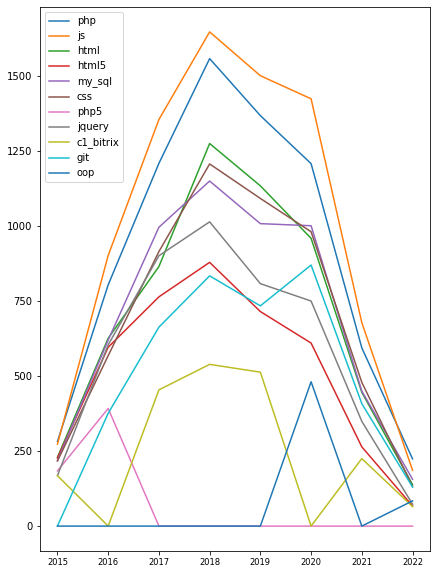

In [36]:
import matplotlib.pyplot as plt

php = np.array([282, 804, 1209, 1558, 1368, 1208, 594, 224])
js = np.array([273, 902, 1355, 1647, 1501, 1424, 678, 186])
html = np.array([229, 626, 865, 1275, 1134, 959, 446, 138])
html5 = np.array([227, 596, 764, 879, 715, 610, 264, 67])
my_sql = np.array([218, 620, 996, 1150, 1008, 1001, 450, 156])
css = np.array([217, 568, 915, 1207, 1092, 981, 479, 132 ])
css3 = np.array([203, 535, 548, 704, 567, 487, 218, 0])
php5 = np.array([184, 392, 0, 0, 0, 0, 0, 0 ])
jquery = np.array([168, 604, 901, 1014, 808, 750, 349, 73 ])
c1_bitrix = np.array([168, 0, 454, 539, 513, 0, 225, 65 ])
git = np.array([0, 376, 663, 834, 734, 870, 408, 130 ])
oop = np.array([0, 0, 0, 0, 0, 481, 0, 84 ])

legends = ['php', 'js', 'html', 'html5', 'my_sql', 'css', 'php5', 'jquery', 'c1_bitrix', 'git', 'oop']
years = [str(i) for i in range(2015,2023)]

fig = plt.figure(figsize=(7,10))

for i in legends:
    plt.plot(eval(i))

plt.legend(legends, loc='upper left')
plt.xticks(range(len(years)), years, size='small')
plt.show()

In [38]:
import matplotlib

In [39]:
matplotlib.__version__

'3.5.1'

In [43]:
my_list = [(1,2),(2,3),(4,5),(8,12)]
{str(i):[t] for i,t in enumerate(my_list)}
{'0': [(1, 2)], '1': [(2, 3)], '2': [(4, 5)], '3': [(8, 12)]}

{'0': [(1, 2)], '1': [(2, 3)], '2': [(4, 5)], '3': [(8, 12)]}

In [45]:
from sklearn.feature_extraction.text import CountVectorizer


corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?']

cnt = CountVectorizer()
sparse = cnt.fit_transform(corpus)
sparse.todense()

matrix([[0, 1, 1, 1, 0, 0, 1, 0, 1],
        [0, 2, 0, 1, 0, 1, 1, 0, 1],
        [1, 0, 0, 1, 1, 0, 1, 1, 1],
        [0, 1, 1, 1, 0, 0, 1, 0, 1]])

matrix([[0, 1, 1, 1, 0, 0, 1, 0, 1],
        [0, 2, 0, 1, 0, 1, 1, 0, 1],
        [1, 0, 0, 1, 1, 0, 1, 1, 1],
        [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [49]:
cnt.vocabulary_

{'this': 8,
 'is': 3,
 'the': 6,
 'first': 2,
 'document': 1,
 'second': 5,
 'and': 0,
 'third': 7,
 'one': 4}

[('and', 0),
 ('document', 1),
 ('first', 2),
 ('is', 3),
 ('one', 4),
 ('second', 5),
 ('the', 6),
 ('third', 7),
 ('this', 8)]

In [53]:
output = pd.DataFrame(sparse.todense(), 
                      index=corpus, 
                      columns=sorted(cnt.vocabulary_.items(), 
                                     key=lambda x: x[1]))
output

,"(and, 0)","(document, 1)","(first, 2)","(is, 3)","(one, 4)","(second, 5)","(the, 6)","(third, 7)","(this, 8)"
This is the first document.,0,1,1,1,0,0,1,0,1
This document is the second document.,0,2,0,1,0,1,1,0,1
And this is the third one.,1,0,0,1,1,0,1,1,1
Is this the first document?,0,1,1,1,0,0,1,0,1


In [106]:
from collections import Counter

cleans = lambda x: "".join(filter(str.isalnum, x.lower()))         #function to remove non alpha characters
tokens = [[clean(j) for j in i.split()] for i in corpus]           #clean and convert sentences to tokens
counts = map(Counter, tokens)                                      #get count of tokens for each sentence
result = pd.DataFrame(counts, index=corpus).fillna(0).astype(int)  #save as dataframe
result

,this,is,the,first,document,second,and,third,one
This is the first document.,1,1,1,1,1,0,0,0,0
This document is the second document.,1,1,1,0,2,1,0,0,0
And this is the third one.,1,1,1,0,0,0,1,1,1
Is this the first document?,1,1,1,1,1,0,0,0,0


[Counter({'this': 1, 'is': 1, 'the': 1, 'first': 1, 'document': 1}),
 Counter({'this': 1, 'document': 2, 'is': 1, 'the': 1, 'second': 1}),
 Counter({'and': 1, 'this': 1, 'is': 1, 'the': 1, 'third': 1, 'one': 1}),
 Counter({'is': 1, 'this': 1, 'the': 1, 'first': 1, 'document': 1})]

In [104]:
clean = lambda x: "".join(filter(str.isalnum, x.lower()))
[[clean(j) for j in i.split()] for i in corpus]

[['this', 'is', 'the', 'first', 'document'],
 ['this', 'document', 'is', 'the', 'second', 'document'],
 ['and', 'this', 'is', 'the', 'third', 'one'],
 ['is', 'this', 'the', 'first', 'document']]

In [108]:
import pandas as pd
import numpy as np
import random

repeating_times = 4
df = pd.DataFrame({"col1": [1, 2, 3, 4, 5]*repeating_times,
                   "col2": ['a', 'b', 'c', 'd', 'e']*repeating_times,
                   "true": ['P', 'P', 'N', 'P', 'N']*repeating_times,
                   "pred": random.choices(["P", "N"], k=5*repeating_times)})

grps = df.groupby(by=["col1", "col2"])
true_pos = grps.apply(lambda gr: np.sum(gr[gr['pred'] == 'P']["true"] == 'P'))
true_pos

col1  col2
1     a       2
2     b       4
3     c       0
4     d       1
5     e       0
dtype: int64

In [ ]:
######### FUNCTION 1 ###########

from sklearn.feature_extraction.text import CountVectorizer

def bag_of_words(corpus):
    cnt = CountVectorizer()
    sparse = cnt.fit_transform(corpus)
    return sparse.todense()

bag_of_words(corpus)


######### FUNCTION 2 ###########

from collections import Counter

def bag_of_words(corpus):
    cleans = lambda x: "".join(filter(str.isalnum, x.lower()))         #function to remove non alpha characters
    tokens = [[clean(j) for j in i.split()] for i in corpus]           #clean and convert sentences to tokens
    counts = map(Counter, tokens)                                      #get count of tokens for each sentence
    result = pd.DataFrame(counts, index=corpus).fillna(0).astype(int)  #save as dataframe
    return result

bag_of_words(corpus)

In [110]:
df = pd.read_clipboard()
df.to_dict('list')

{'Months': ['2023-01', '2022-12', '2022-11', '2022-10'],
 '2022-10': [10.0, 2.0, nan, 12.0],
 '2022-11': [nan, 14.0, 11.0, nan],
 '2022-12': [12.0, 14.0, nan, nan],
 '2023-01': [13.0, nan, nan, nan],
 '…': ['…', '…', '…', None]}

In [112]:
import numpy as np

In [166]:
df = pd.DataFrame({'Months': ['2023-01', '2022-12', '2022-11', '2022-10'],
                   '2022-10': [10.0, 2.0, np.nan, 12.0],
                   '2022-11': [np.nan, 14.0, 11.0, np.nan],
                   '2022-12': [12.0, 14.0, np.nan, np.nan],
                   '2023-01': [13.0, np.nan, np.nan, np.nan]})

In [167]:
df

,Months,2022-10,2022-11,2022-12,2023-01
0,2023-01,10.0,NaN,12.0,13.0
1,2022-12,2.0,14.0,14.0,NaN
2,2022-11,NaN,11.0,NaN,NaN
3,2022-10,12.0,NaN,NaN,NaN


In [169]:
vals = df.set_index('Months').values
vals

array([[10., nan, 12., 13.],
       [ 2., 14., 14., nan],
       [nan, 11., nan, nan],
       [12., nan, nan, nan]])

In [174]:
rot = np.rot90(vals)
idx = np.tril_indices(vals.shape[0])
tri = rot[idx]
nan = np.isnan(tri)
get = tri[nan]
get = 0

In [176]:
rot

array([[13., nan, nan, nan],
       [12., 14., nan, nan],
       [nan, 14., 11., nan],
       [10.,  2., nan, 12.]])

In [142]:
np.triu(vals)

array([[10., nan, 12., 13.],
       [ 2., 14., 14., nan],
       [ 0., 11., nan, nan],
       [ 0.,  0., nan, nan]])

In [177]:
df.bfill(1)

/var/folders/ck/dvz0vpxx7fz95ld2btkqqvzw0000gn/T/ipykernel_9969/2738748561.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.bfill will be keyword-only
  df.bfill(1)


,Months,2022-10,2022-11,2022-12,2023-01
0,2023-01,10.0,12.0,12.0,13.0
1,2022-12,2.0,14.0,14.0,NaN
2,2022-11,11.0,11.0,NaN,NaN
3,2022-10,12.0,NaN,NaN,NaN


In [178]:
df = pd.read_clipboard()
df

ParserError: Expected 1 fields in line 5, saw 8. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.

In [220]:
df = pd.read_clipboard()
df.reset_index().to_dict('list')

{'level_0': [1, 2, 3, 4, 5],
 'level_1': ['Stem', 'Option1', 'Option2', 'Option3', 'Option4'],
 'level_2': ['I', 'Yes', 'No', 'Maybe', 'ok'],
 'options': ['am', None, None, None, None],
 'text': ['good', None, None, None, None]}

In [238]:
d = {
  'options': ['Stem', 'Option1', 'Option2', 'Option3', 'Option4', 'Stem', 'Option1', 'Option2', 'Option3', 'Option4' ],
  'text': ['I am good', 'Yes', 'No', 'Maybe', 'ok', 'Not great', 'No', 'No', 'Yes', 'No',]
 }
df = pd.DataFrame(d)


s = 'Stem'
g = df['options'].eq(s).cumsum()
o = df.groupby(g)['text'].apply(list)
o = o.reset_index()
o['options'] = s + o['options'].astype(str)
o.columns = ['Stems','All_4_options_Appended']
print(o)

   Stems           All_4_options_Appended
0  Stem1  [I am good, Yes, No, Maybe, ok]
1  Stem2     [Not great, No, No, Yes, No]


In [226]:
d = {"options":['Stem','option1','option2','option3','option4','Stem','option1','option2','option3','option4'],
     'text':["It's the beginning of the quarter, and you're",
            "Describe the most expensive option first, and",
            "Describe the least expensive option first",
            "Describe the mid-range option first, and then",
            "Ask your manager which option he is most inter",
            "It's the beginning of the quarter, and you're",
            "Describe the most expensive option first, and",
            "Describe the least expensive option first",
            "Describe the mid-range option first, and then",
            "Ask your boss which option he is most interes"]}
df = pd.DataFrame(d)
df

,options,text
0,Stem,"It's the beginning of the quarter, and you're"
1,option1,"Describe the most expensive option first, and"
2,option2,Describe the least expensive option first
3,option3,"Describe the mid-range option first, and then"
4,option4,Ask your manager which option he is most inter
5,Stem,"It's the beginning of the quarter, and you're"
6,option1,"Describe the most expensive option first, and"
7,option2,Describe the least expensive option first
8,option3,"Describe the mid-range option first, and then"
9,option4,Ask your boss which option he is most interes


,options,text
0,Stem,"It's the beginning of the quarter, and you're"
1,option1,"Describe the most expensive option first, and"
2,option2,Describe the least expensive option first
3,option3,"Describe the mid-range option first, and then"
4,option4,Ask your manager which option he is most inter
...,...,...
5,Stem,"It's the beginning of the quarter, and you're"
6,option1,"Describe the most expensive option first, and"
7,option2,Describe the least expensive option first
8,option3,"Describe the mid-range option first, and then"


In [229]:
df_large = pd.concat([df]*5000)

In [235]:
s = 'Stem'
g = df['options'].eq(s).cumsum()
o = df.groupby(g)['text'].apply(list)
o = o.reset_index()
o['options'] = s + o['options'].astype(str)
o.columns = ['Stems','All_4_options_Appended']
o

,Stems,All_4_options_Appended
0,Stem1,"[It's the beginning of the quarter, and you're..."
1,Stem2,"[It's the beginning of the quarter, and you're..."


In [233]:
%%timeit

m = df_large['options'].eq('Stem')

out = (df_large.groupby(m.cumsum().astype(str).radd('Stem'))
         .agg(All_4_Options_Appended=('text', ';'.join))
         .rename_axis('Stems').reset_index()
       )

out

80.6 ms ± 380 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [242]:
df = pd.read_clipboard()
df.reset_index().to_dict('list')

{'index': [], '[100,': []}

In [ ]:
{'level_0': {0: 0, 1: 1, 2: 2, 3: 3},
 'level_1': {0: '[100,', 1: '[100,', 2: '[300,', 3: '[100,'},
 'level_2': {0: '200,', 1: '200,', 2: '500]', 3: '100]'},
 'column_of_lists': {0: '[100,200,300]', 1: [100,300,'200]', 2: '300', 3: '200'},
 'scalar_col': {0: 100.0, 1: 200.0, 2: nan, 3: nan}}

In [ ]:
    column_of_lists   scalar_col
0   [100, 200, 300]       100
1   [100, 200, 200]       200
2   [300, 500]            300
3   [100, 100]            200

In [245]:
d = {'column_of_lists':[[100, 200, 300],
                        [100, 200, 200],
                        [300, 500],
                        [100, 100]],
     'scalar_col':[100,200,300,200]}
df = pd.DataFrame(d)
df

,column_of_lists,scalar_col
0,"[100, 200, 300]",100
1,"[100, 200, 200]",200
2,"[300, 500]",300
3,"[100, 100]",200


In [247]:
from collections import Counter

In [274]:
df = pd.concat([df] * 10000, ignore_index=True)

In [275]:
%timeit df["new1"] = df.apply(lambda x: x["column_of_lists"].count(x["scalar_col"]), axis=1)

%timeit df['new2'] = [x.count(y) for x,y in zip(df['column_of_lists'], df['scalar_col'])]

%timeit df['new3'] = [Counter(j['column_of_lists']).get(j['scalar_col'],0) for i,j in df.iterrows()]

294 ms ± 5.53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
14.9 ms ± 96.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.04 s ± 5.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
perfplot.show()

In [281]:
import perfplot

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [286]:
apply_count = lambda df: df.apply(lambda x: x["column_of_lists"].count(x["scalar_col"]), axis=1)
apply_count(df)

0        1
1        2
2        1
3        0
4        1
        ..
39995    0
39996    1
39997    2
39998    1
39999    0
Length: 40000, dtype: int64

In [296]:
d = lambda n: pd.concat([df]*n, ignore_index=True)
d(2)

,column_of_lists,scalar_col
0,"[100, 200, 300]",100
1,"[100, 200, 200]",200
2,"[300, 500]",300
3,"[100, 100]",200
4,"[100, 200, 300]",100
5,"[100, 200, 200]",200
6,"[300, 500]",300
7,"[100, 100]",200


Output()

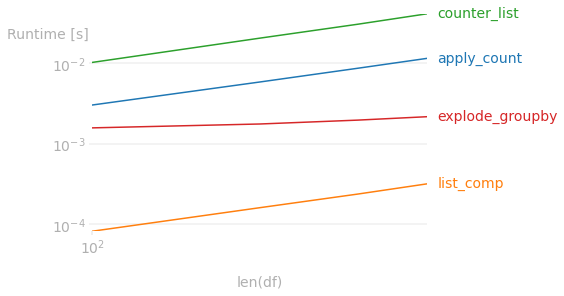

In [299]:
import pandas as pd
import perfplot
from collections import Counter

####################################
## DATA ##
d = {'column_of_lists':[[100, 200, 300],
                        [100, 200, 200],
                        [300, 500],
                        [100, 100]],
     'scalar_col':[100,200,300,200]}
df = pd.DataFrame(d)

#####################################
## METHODS ##

apply_count = lambda df: df.apply(lambda x: x["column_of_lists"].count(x["scalar_col"]), axis=1)
list_comp = lambda df: [x.count(y) for x,y in zip(df['column_of_lists'], df['scalar_col'])]
counter_list = lambda df: [Counter(j['column_of_lists']).get(j['scalar_col'],0) for i,j in df.iterrows()]
def explode_groupby(df):
    x = df.explode('column_of_lists')
    return x.column_of_lists.eq(x.scalar_col).groupby(x.index).sum()

#####################################
## BENCHMARKS ##

perfplot.show(
    setup = lambda n: pd.concat([df]*n, ignore_index=True),
    kernels = [apply_count, list_comp, counter_list, explode_groupby],
    labels = ["apply_count", "list_comp", "counter_list", "explode_groupby"],
    n_range= [k*100 for k in range(1,5)],
    xlabel="len(df)"
)

In [279]:
%%timeit

x = df.explode('column_of_lists')
df['new4'] = x.column_of_lists.eq(x.scalar_col).groupby(x.index).sum()

26.9 ms ± 828 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [277]:
df

,column_of_lists,scalar_col,new3,new1,new2,counts
0,"[100, 200, 300]",100,1,1,1,1
1,"[100, 200, 200]",200,2,2,2,2
2,"[300, 500]",300,1,1,1,1
3,"[100, 100]",200,0,0,0,0
4,"[100, 200, 300]",100,1,1,1,1
...,...,...,...,...,...,...
39995,"[100, 100]",200,0,0,0,0
39996,"[100, 200, 300]",100,1,1,1,1
39997,"[100, 200, 200]",200,2,2,2,2
39998,"[300, 500]",300,1,1,1,1


In [ ]:
[[1, 2, 3], 
 [1, 2, 6], 
 [1, 5, 3], 
 [1, 5, 6], 
 [4, 2, 3], 
 [4, 2, 6], 
 [4, 5, 3], 
 [4, 5, 6]]

In [303]:
from itertools import product

In [ ]:
lst = [[1, 2, 3], [4, 5, 6]]
ist(product(*(zip(*lst))))

[(1, 2, 3),
 (1, 2, 6),
 (1, 5, 3),
 (1, 5, 6),
 (4, 2, 3),
 (4, 2, 6),
 (4, 5, 3),
 (4, 5, 6)]

In [312]:
lst = [[1, 2, 3], 
       [4, 5, 6]]

In [415]:
list(product(*list(zip(*arr))))

[(1, 2, 3),
 (1, 2, 6),
 (1, 5, 3),
 (1, 5, 6),
 (4, 2, 3),
 (4, 2, 6),
 (4, 5, 3),
 (4, 5, 6)]

In [431]:
arr = np.array(lst)[:,[1,0,2]]
arr

array([[2, 1, 3],
       [5, 4, 6]])

In [434]:
import numpy as np

arr = np.array(lst)
np.stack(np.meshgrid(*arr.T),-1).reshape(-1,3)

array([[1, 2, 3],
       [1, 2, 6],
       [4, 2, 3],
       [4, 2, 6],
       [1, 5, 3],
       [1, 5, 6],
       [4, 5, 3],
       [4, 5, 6]])

array([[1, 2, 3],
       [1, 2, 6],
       [4, 2, 3],
       [4, 2, 6],
       [1, 5, 3],
       [1, 5, 6],
       [4, 5, 3],
       [4, 5, 6]])

In [435]:
import numpy as np

order = [1,0,2]
arr = np.array(lst)[:,order]
np.stack(np.meshgrid(*arr.T),-1).reshape(-1,3)[:,order]

array([[1, 2, 3],
       [1, 2, 6],
       [1, 5, 3],
       [1, 5, 6],
       [4, 2, 3],
       [4, 2, 6],
       [4, 5, 3],
       [4, 5, 6]])

array([[1, 2, 3],
       [1, 2, 6],
       [1, 5, 3],
       [1, 5, 6],
       [4, 2, 3],
       [4, 2, 6],
       [4, 5, 3],
       [4, 5, 6]])

array([[1, 2, 3],
       [1, 5, 3],
       [1, 2, 6],
       [1, 5, 6],
       [4, 2, 3],
       [4, 5, 3],
       [4, 2, 6],
       [4, 5, 6]])

In [345]:
np.stack(np.meshgrid(*arr.T).T,-1).reshape(-1,3)

AttributeError: 'list' object has no attribute 'T'

array([[3, 6],
       [2, 5],
       [1, 4]])

In [410]:
arr.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [411]:
np.fliplr(arr).T

array([[3, 6],
       [2, 5],
       [1, 4]])

array([[1, 2, 3],
       [1, 5, 3],
       [1, 2, 6],
       [1, 5, 6],
       [4, 2, 3],
       [4, 5, 3],
       [4, 2, 6],
       [4, 5, 6]])

In [386]:
np.meshgrid(*arr.T)

[array([[[1, 1],
         [4, 4]],
 
        [[1, 1],
         [4, 4]]]),
 array([[[2, 2],
         [2, 2]],
 
        [[5, 5],
         [5, 5]]]),
 array([[[3, 6],
         [3, 6]],
 
        [[3, 6],
         [3, 6]]])]

In [300]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [436]:
df=pd.DataFrame({'person':['Sebastian','Sebastian','Sebastian', 'Maria', 'Maria', 'Maria', 'Achim','Achim','Achim'],'item':['house','garden','sink','sink','gold','house','stone','gold','wood']})

In [437]:
df

,person,item
0,Sebastian,house
1,Sebastian,garden
2,Sebastian,sink
3,Maria,sink
4,Maria,gold
5,Maria,house
6,Achim,stone
7,Achim,gold
8,Achim,wood


In [614]:
%%timeit

forbidden_item = 'gold'
pivot = pd.get_dummies(df.set_index('person')['item']).groupby(level=0).max()
result = pivot[pivot[forbidden_item]==0].index.tolist()



905 µs ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [615]:
%%timeit

no_gold = df.groupby('person').apply(lambda x: (x['item'].ne('gold')).all())
persons_no_gold = no_gold[no_gold].index.values

607 µs ± 1.97 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [492]:
import functools
import operator

In [498]:
l= [['/files/d2624a57c0de7129c5895ce13a34eddc'], 
    '/files/2f7d4fed1654fca61cef30a167b3b558', 
    '/files/71ee92e09c65bf3b2c90ae9a905873db']

In [503]:
from collections.abc import Iterable

def flatten(xs):
    for x in xs:
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            yield from flatten(x)
        else:
            yield x
            
list(flatten(l))

['/files/d2624a57c0de7129c5895ce13a34eddc',
 '/files/2f7d4fed1654fca61cef30a167b3b558',
 '/files/71ee92e09c65bf3b2c90ae9a905873db']

In [548]:
A = np.array([[ 2 ,1, -1, -1, -1],
              [ 1 ,4,  3, -1, -1],
              [ 3 ,1,  0, -1, -1]])
A

array([[ 2,  1, -1, -1, -1],
       [ 1,  4,  3, -1, -1],
       [ 3,  1,  0, -1, -1]])

In [547]:
B = np.array([[ 0.7 ,0.4, 1.5  , 2.0  ,4.4 ],
              [ 0.8 ,4.0,  0.3 , 0.11 ,0.53],
              [ 0.6 ,7.4,  0.22, 0.71 ,0.06]])
B

array([[0.7 , 0.4 , 1.5 , 2.  , 4.4 ],
       [0.8 , 4.  , 0.3 , 0.11, 0.53],
       [0.6 , 7.4 , 0.22, 0.71, 0.06]])

In [558]:
np.where(A==-1,0,B)

array([[0.7 , 0.4 , 0.  , 0.  , 0.  ],
       [0.8 , 4.  , 0.3 , 0.  , 0.  ],
       [0.6 , 7.4 , 0.22, 0.  , 0.  ]])

In [556]:
A

array([[ 2,  1, -1, -1, -1],
       [ 1,  4,  3, -1, -1],
       [ 3,  1,  0, -1, -1]])

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2]])

In [561]:
mask = A!=-1
mask

array([[ True,  True, False, False, False],
       [ True,  True,  True, False, False],
       [ True,  True,  True, False, False]])

In [611]:
idx = np.stack([np.indices(A.shape)[0], A]).transpose(2,1,0).reshape(-1,2)
idx = idx[~(idx==-1).any(1)]
idx

array([[0, 2],
       [1, 1],
       [2, 3],
       [0, 1],
       [1, 4],
       [2, 1],
       [1, 3],
       [2, 0]])

In [612]:
B[np.ix_(idx[0],idx[1])]

ValueError: Cross index must be 1 dimensional

In [622]:
a = [1,2,3]

hex(id(a))

'0x1778bff00'

[hex(id(i)) for i in a]

['0x10326e930', '0x10326e950', '0x10326e970']

['0x10326e930', '0x10326e950', '0x10326e970']

In [623]:
b = [1,2,3,a]

[hex(id(i)) for i in b]

['0x10326e930', '0x10326e950', '0x10326e970', '0x1778bff00']

['0x10326e930', '0x10326e950', '0x10326e970', '0x1778bff00']

In [625]:
b = [1,2,3,b]



'0x1590ad480'

In [626]:
b = [1,2,3,b]

hex(id(b)) #'0x1590ad480'
[hex(id(i)) for i in b]

['0x10326e930', '0x10326e950', '0x10326e970', '0x17789f380']

['0x10326e930', '0x10326e950', '0x10326e970', '0x17789f380']

In [648]:
def f():
    a = [1,2,3]

In [649]:
import dis
dis.dis(f)

  2           0 BUILD_LIST               0
              2 LOAD_CONST               1 ((1, 2, 3))
              4 LIST_EXTEND              1
              6 STORE_FAST               0 (a)
              8 LOAD_CONST               0 (None)
             10 RETURN_VALUE


In [650]:
import numpy as np
arrays = [
    np.array(["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"]),
    np.array(["one", "two", "one", "two", "one", "two", "one", "two"]),
]
s = pd.Series(np.random.randn(8), index=arrays)
df = pd.DataFrame(np.random.randn(8, 4), index=arrays)
df.index.names = ['index1', 'index2']
df

0         1         2         3
index1 index2                                        
bar    one     0.763661 -1.959814 -0.971977 -0.883897
       two     1.238006 -0.978168  1.217761  0.920181
baz    one    -0.266530 -0.958332  0.181648 -0.200252
       two    -1.127552  0.462176 -0.349608 -1.245938
foo    one     0.915507  0.122886 -0.204025 -1.448784
       two     1.555195 -0.771137 -0.302535  0.523817
qux    one     0.979383  1.564706  0.088528 -0.599288
       two    -0.025379 -2.202081 -0.457303 -0.027301